# Investigate afterpulse by day

Currently, I expect that each day there is an afterpulse calibration, there should be 3 files that are possible candidates for being the afterpulse calibration file:

1. Afterpulse file with closed aperture (desired file)
2. File where aperture is open and data is collected
3. Resuming of data collection

I would like to investigate the order in which these are taken, so that I can more reliably use them in my work...

## Loading the filenames

In [219]:
import mplgz_to_ingested as mplgz
import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
dir_root = '/gws/nopw/j04/ncas_radar_vol2/data/ICECAPSarchive/mpl/raw'
candidateFiles = mplgz.afterpulse.get_all_afterpulse(dir_root)

print(candidateFiles)

['201301090011.mpl.gz', '201508161226.mpl.gz', '201508161955.mpl.gz', '201508162015.mpl.gz', '201601192225.mpl.gz', '201601261328.mpl.gz', '201601261338.mpl.gz', '201601261351.mpl.gz', '201602241305.mpl.gz', '201602241314.mpl.gz', '201602241335.mpl.gz', '201603231417.mpl.gz', '201603231426.mpl.gz', '201603231440.mpl.gz', '201604271549.mpl.gz', '201604271605.mpl.gz', '201604271615.mpl.gz', '201605271732.mpl.gz', '201605271741.mpl.gz', '201605271752.mpl.gz', '201605310003.mpl.gz', '201606011603.mpl.gz', '201606051811.mpl.gz', '201606052039.mpl.gz', '201606052250.mpl.gz', '201606251729.mpl.gz', '201606251739.mpl.gz', '201606251749.mpl.gz', '201607251715.mpl.gz', '201607251726.mpl.gz', '201607251736.mpl.gz', '201608301729.mpl.gz', '201609071535.mpl.gz', '201609071547.mpl.gz', '201609071558.mpl.gz', '201610251342.mpl.gz', '201610251350.mpl.gz', '201611291428.mpl.gz', '201611291436.mpl.gz', '201611291446.mpl.gz', '201612281738.mpl.gz', '201612281749.mpl.gz', '201612281758.mpl.gz', '201701301

In [3]:
# the calibration files start earnestly from 2016 onwards, so I'll remove the first 4 elements from the list
tocheck = candidateFiles[4:]
print(tocheck)

['201601192225.mpl.gz', '201601261328.mpl.gz', '201601261338.mpl.gz', '201601261351.mpl.gz', '201602241305.mpl.gz', '201602241314.mpl.gz', '201602241335.mpl.gz', '201603231417.mpl.gz', '201603231426.mpl.gz', '201603231440.mpl.gz', '201604271549.mpl.gz', '201604271605.mpl.gz', '201604271615.mpl.gz', '201605271732.mpl.gz', '201605271741.mpl.gz', '201605271752.mpl.gz', '201605310003.mpl.gz', '201606011603.mpl.gz', '201606051811.mpl.gz', '201606052039.mpl.gz', '201606052250.mpl.gz', '201606251729.mpl.gz', '201606251739.mpl.gz', '201606251749.mpl.gz', '201607251715.mpl.gz', '201607251726.mpl.gz', '201607251736.mpl.gz', '201608301729.mpl.gz', '201609071535.mpl.gz', '201609071547.mpl.gz', '201609071558.mpl.gz', '201610251342.mpl.gz', '201610251350.mpl.gz', '201611291428.mpl.gz', '201611291436.mpl.gz', '201611291446.mpl.gz', '201612281738.mpl.gz', '201612281749.mpl.gz', '201612281758.mpl.gz', '201701301635.mpl.gz', '201701301644.mpl.gz', '201701301704.mpl.gz', '201702271235.mpl.gz', '201702281

## Number of files per calibration day

This section will focus on determining how many files are generated per day when calibrations are performed. This will allow us to determine if edge-cases like files-on-the-hour or calibrations across 2 days occur.

In [4]:
# I will recursively split the list tocheck until they are associated by day. Then I will determine the number per day and print this off.
tocheck = candidateFiles[4:]

n_per_day = {}

for f in tocheck:
    year = f[:4]
    if year not in n_per_day:
        n_per_day[year] = {}

    month = f[4:6]
    if month not in n_per_day[year]:
        n_per_day[year][month] = {}

    day = f[6:8]
    if day not in n_per_day[year][month]:
        n_per_day[year][month][day] = 0

    n_per_day[year][month][day] += 1

# print results
dist = [0]*7

print(f' {"year":<6} | {"month":<6} | {"day":<6} | num')
for year in n_per_day:
    for month in n_per_day[year]:
        for day in n_per_day[year][month]:
            print(f' {year:<6} | {month:<6} | {day:<6} | {n_per_day[year][month][day]}')

            dist[n_per_day[year][month][day] - 1] +=1
    print('') # blank line to seperate years

print('Distribution:')
print(f' 1  | 2  | 3  | 4  | 5  | 6  | 7')
print(f' {dist[0]:<3}| {dist[1]:<3}| {dist[2]:<3}| {dist[3]:<3}| {dist[4]:<3}| {dist[5]:<3}| {dist[6]:<3}')

 year   | month  | day    | num
 2016   | 01     | 19     | 1
 2016   | 01     | 26     | 3
 2016   | 02     | 24     | 3
 2016   | 03     | 23     | 3
 2016   | 04     | 27     | 3
 2016   | 05     | 27     | 3
 2016   | 05     | 31     | 1
 2016   | 06     | 01     | 1
 2016   | 06     | 05     | 3
 2016   | 06     | 25     | 3
 2016   | 07     | 25     | 3
 2016   | 08     | 30     | 1
 2016   | 09     | 07     | 3
 2016   | 10     | 25     | 2
 2016   | 11     | 29     | 3
 2016   | 12     | 28     | 3

 2017   | 01     | 30     | 3
 2017   | 02     | 27     | 1
 2017   | 02     | 28     | 2
 2017   | 03     | 01     | 1
 2017   | 03     | 28     | 3
 2017   | 04     | 27     | 3
 2017   | 05     | 19     | 1
 2017   | 05     | 20     | 4
 2017   | 06     | 20     | 3
 2017   | 06     | 28     | 1
 2017   | 07     | 20     | 3
 2017   | 08     | 21     | 3
 2017   | 09     | 19     | 3
 2017   | 10     | 19     | 3
 2017   | 11     | 23     | 3
 2017   | 12     | 19     | 3

 2018 

In [5]:
days_of_three = []

for year in n_per_day:
    for month in n_per_day[year]:
        for day in n_per_day[year][month]:
            if n_per_day[year][month][day] == 3:
                days_of_three.append(year + month + day)

print(days_of_three)

['20160126', '20160224', '20160323', '20160427', '20160527', '20160605', '20160625', '20160725', '20160907', '20161129', '20161228', '20170130', '20170328', '20170427', '20170620', '20170720', '20170821', '20170919', '20171019', '20171123', '20171219', '20180119', '20180213', '20180314', '20180413', '20180514', '20180617', '20180718', '20180820', '20180917', '20181018', '20181120', '20181220', '20190212', '20190415', '20190516', '20190711', '20190714', '20190819', '20190914', '20191015', '20191214', '20200116', '20200214', '20200316', '20200417', '20200516', '20200615', '20200715', '20200815', '20200915', '20201015', '20201115', '20201215', '20210115', '20210219', '20210315', '20210415', '20210515', '20220714', '20220815', '20220915', '20221031', '20221130', '20221230', '20230210', '20230212', '20230312', '20230412']


## Which of the three files?

Now that I've identified the majority of cases have 3 files per calibration day, I can start going through the days when this happens systematically, to see what the three files represent.

### Findings:

- Generally, I want the second afterpulse file of the three. The forst file contains an afterpulse at half the vertical resolution of the standard measurements. The second one doesn't seem to be affected by clouds.

- The afterpulse signal can be smoothed with a convolutional filter acting as a rolling average. Larger windows result in smoother signals at higher altitudes, but result in larger edge effects and the afterpulse being higher at low altitudes, possibly affecting the low-altitude cloud signal.

- Smoothing the signal that has been averaged in time seems to be the best approach (rather than smoothing the logarithm of the curve). A kernal of length 20 smooths the high-altitude signal whilst not extending the range of high afterpulse values too siginificantly.

##### Create iterator

In [6]:
days_of_three_iter = iter(days_of_three)

### Iterate

In [208]:
# iterate day
daystr = next(days_of_three_iter)
print(daystr)

20180514


In [209]:
# get the three files associated with calbration candidates for that day
globstr = dir_root + '/' + daystr + '*.mpl.gz'

dayfiles = glob.glob(globstr)
calibFiles = sorted([f for f in dayfiles if f[-9:] != '00.mpl.gz'])
print(calibFiles)

['/gws/nopw/j04/ncas_radar_vol2/data/ICECAPSarchive/mpl/raw/201805141313.mpl.gz', '/gws/nopw/j04/ncas_radar_vol2/data/ICECAPSarchive/mpl/raw/201805141326.mpl.gz', '/gws/nopw/j04/ncas_radar_vol2/data/ICECAPSarchive/mpl/raw/201805141336.mpl.gz']


In [210]:
ds1 = mplgz.load.load_mplgz(calibFiles[0])
ds2 = mplgz.load.load_mplgz(calibFiles[1])
ds3 = mplgz.load.load_mplgz(calibFiles[2])

In [211]:
#ds1

In [212]:
#ds2

In [213]:
#ds3

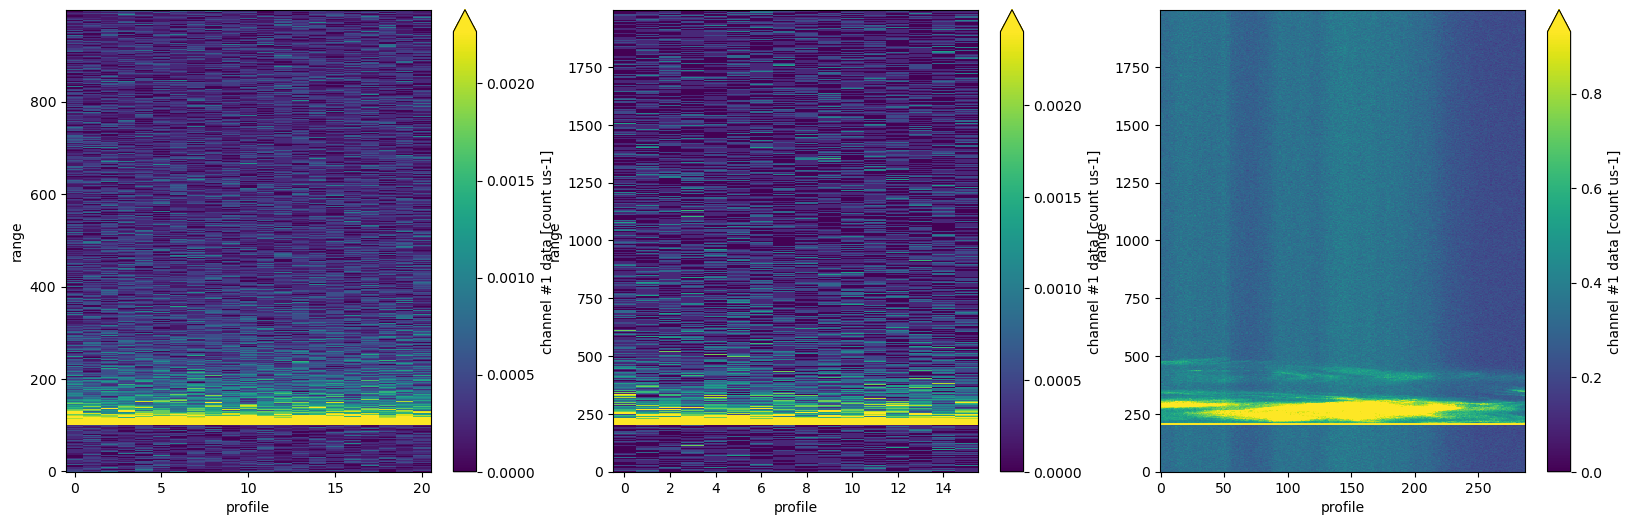

In [217]:
fig,axs = plt.subplots(1,3,figsize=(20,6))

for d,a in zip([ds1,ds2,ds3],axs):
    d.channel_1.plot(x='profile',y='range',vmin=0,robust=True,ax=a)

plt.show()

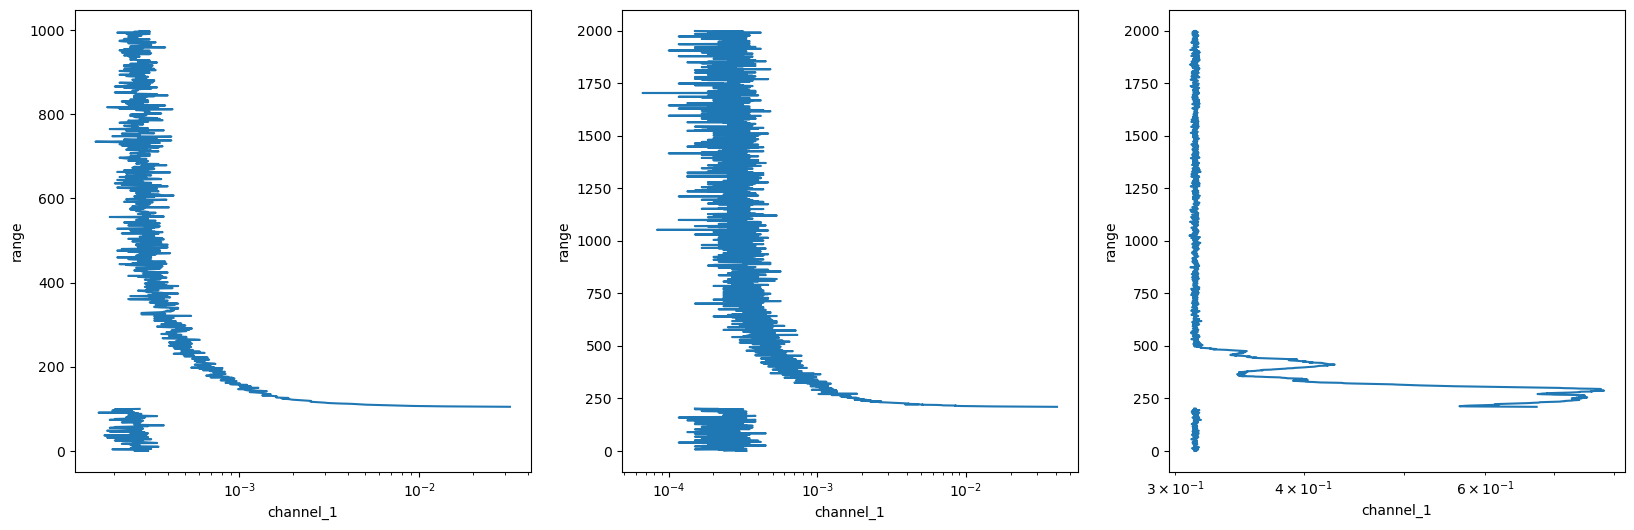

In [218]:
fig,axs = plt.subplots(1,3,figsize=(20,6))

for d,a in zip([ds1,ds2,ds3],axs):
    d.channel_1.where(d.channel_1<1).mean(dim='profile').plot(y='range',ax=a)
    a.set_xscale('log')

plt.show()

## smoothing the afterpulse

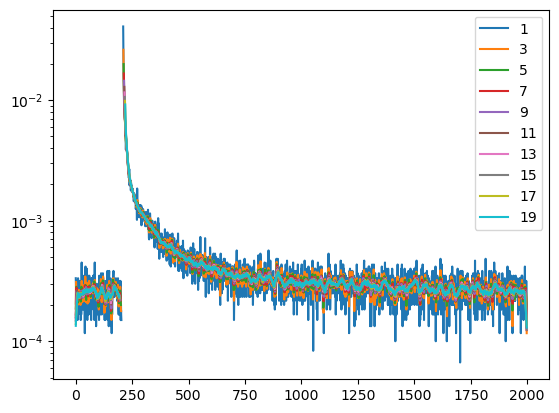

In [233]:
def smooth(s,nk):
    # nk: rolling average window size
    # signal to smooth
    return np.convolve(s,np.ones(nk)/nk,mode='same')

for i in range(1,20,2):
    plt.plot(smooth(ds2.channel_1.where(ds2.channel_1 < 1).mean(dim='profile'),i),label=str(i))
plt.legend()
plt.yscale('log')

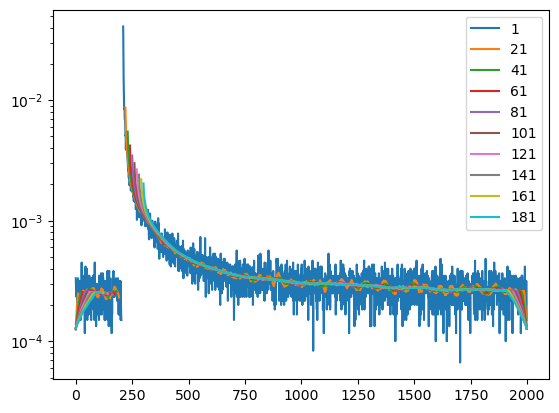

In [234]:
for i in range(1,200,20):
    plt.plot(smooth(ds2.channel_1.where(ds2.channel_1 < 1).mean(dim='profile'),i),label=str(i))
plt.legend()
plt.yscale('log')

/home/users/eeasm/.conda/envs/icesat_summit_py39/lib/python3.9/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


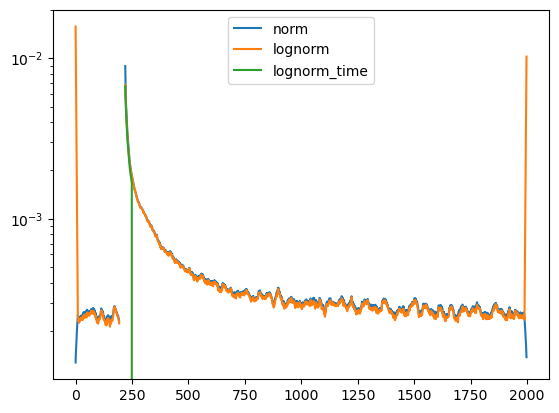

In [240]:
# norm vs log norm
nk = 20

norm = smooth(ds2.channel_1.where(ds2.channel_1 < 1).mean(dim='profile'),nk)

lognorm = np.exp(smooth(np.log(ds2.channel_1.where(ds2.channel_1 < 1).mean(dim='profile')),nk))

lognorm_time = np.exp(smooth(np.log(ds2.channel_1.where(ds2.channel_1 < 1)).mean(dim='profile'),nk))

plt.plot(norm,label='norm')
plt.plot(lognorm,label='lognorm')
plt.plot(lognorm_time,label='lognorm_time')
plt.legend()
plt.yscale('log')


### FINDINGS!!!
+ File 1 contains data at half the vertical resolution of the normal data, as seen by the same form as Fig2 (peak signal at ground).
+ File 2 appears to be what I want. Even in scenes where Fig3 shows clouds, Fig2 always has the expected afterpulse form.